In [3]:
import requests
import pandas as pd
import json
import datetime as dt
#import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
#requesting data for the price of rice in EU member states
riceprice=requests.get("https://www.ec.europa.eu/agrifood/api/rice/prices?")

In [5]:
#Raw Data cleaning
df_riceprice_rawdata=pd.DataFrame(riceprice.json())
#display(df_riceprice)
#Data filtering 
df_riceprice=df_riceprice_rawdata.copy()
df_riceprice["price"]=df_riceprice["price"].str.replace("€","") # removing the € character in price column
df_riceprice["price"]=pd.to_numeric(df_riceprice["price"])   # changing price data into numeric data type
display(df_riceprice.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19176 entries, 0 to 19175
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   memberStateCode  19176 non-null  object 
 1   memberStateName  19176 non-null  object 
 2   beginDate        19176 non-null  object 
 3   endDate          19176 non-null  object 
 4   weekNumber       19176 non-null  int64  
 5   price            19176 non-null  float64
 6   unit             19176 non-null  object 
 7   marketingYear    19176 non-null  object 
 8   stage            19176 non-null  object 
 9   type             19176 non-null  object 
 10  variety          19176 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.6+ MB


None

In [6]:
# formating the beginDate and endDate into Datetime data type
df_riceprice["beginDate"]=pd.to_datetime(df_riceprice["beginDate"],yearfirst=True)
print(df_riceprice.info())


C:\Users\Milner\AppData\Local\Temp\ipykernel_19500\1573098569.py:2: UserWarning: Parsing '17/12/2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_riceprice["beginDate"]=pd.to_datetime(df_riceprice["beginDate"],yearfirst=True)
C:\Users\Milner\AppData\Local\Temp\ipykernel_19500\1573098569.py:2: UserWarning: Parsing '25/02/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_riceprice["beginDate"]=pd.to_datetime(df_riceprice["beginDate"],yearfirst=True)
C:\Users\Milner\AppData\Local\Temp\ipykernel_19500\1573098569.py:2: UserWarning: Parsing '28/01/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_riceprice["beginDate"]=pd.to_datetime(df_riceprice["beginDate"],yearfirst=True)
C:\Users\Milner\AppData\Local\Temp\ipykernel_19500\1573098569.py:2: UserWarning: Parsing '28/05/2007' in DD/MM/YYYY format. Provide format or 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19176 entries, 0 to 19175
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   memberStateCode  19176 non-null  object        
 1   memberStateName  19176 non-null  object        
 2   beginDate        19176 non-null  datetime64[ns]
 3   endDate          19176 non-null  object        
 4   weekNumber       19176 non-null  int64         
 5   price            19176 non-null  float64       
 6   unit             19176 non-null  object        
 7   marketingYear    19176 non-null  object        
 8   stage            19176 non-null  object        
 9   type             19176 non-null  object        
 10  variety          19176 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 1.6+ MB
None


In [81]:
# Filtering by Year from RAW data
series_byyear=df_riceprice_rawdata.beginDate.str.extract(r"[/](\d{4})") #Series data for each year
#print(type(df_data_byyear))
df_ricebyyear=pd.concat([df_riceprice, df_data_byyear], axis=1)
df_ricebyyear.rename(columns={0:"Year"}, inplace=True) #Renaming column as Year
df_ricebyyear.set_index("Year", inplace=True) #Sorting index by year
df_ricebyyear.sort_index(inplace=True)
display(df_ricebyyear.sort_values("memberStateName"))
#display(df_ricebyyear.index)

,memberStateCode,memberStateName,beginDate,endDate,weekNumber,price,unit,marketingYear,stage,type,variety
Year,,,,,,,,,,,
2022,BG,Bulgaria,2022-04-04,10/04/2022,32,858.98,Tonne,2021/2022,Milled non parboiled,Japonica,Average
2016,BG,Bulgaria,2016-01-25,31/01/2016,22,871.77,Tonne,2015/2016,Milled non parboiled,Japonica,Not informed
2016,BG,Bulgaria,2016-02-29,06/03/2016,27,871.77,Tonne,2015/2016,Milled non parboiled,Japonica,Not informed
2016,BG,Bulgaria,2016-04-01,10/01/2016,19,871.77,Tonne,2015/2016,Milled non parboiled,Japonica,Not informed
2016,BG,Bulgaria,2016-10-31,06/11/2016,10,818.08,Tonne,2016/2017,Milled non parboiled,Japonica,Not informed
...,...,...,...,...,...,...,...,...,...,...,...
2002,ES,Spain,2002-04-11,10/11/2002,10,255.00,Tonne,2002/2003,Paddy,Japonica,Average
2002,ES,Spain,2002-04-29,05/05/2002,35,270.00,Tonne,2001/2002,Paddy,Japonica,Average
2002,ES,Spain,2002-03-06,09/06/2002,40,270.00,Tonne,2001/2002,Paddy,Japonica,Average


In [109]:
#Filtering data for rice price in each country 
print(df_ricebyyear.memberStateName.unique())
df_Italy=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='Italy'")
Italy=df_Italy.groupby(["Year"]).mean().rename(columns={"price":"Italy"})
df_Greece=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='Greece'")
Greece=df_Greece.groupby(["Year"]).mean().rename(columns={"price":"Greece"})
df_Spain=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='Spain'")
Spain=df_Spain.groupby(["Year"]).mean().rename(columns={"price":"Spain"})
df_Portugal=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='Portugal'")
Portugal=df_Portugal.groupby(["Year"]).mean().rename(columns={"price":"Portugal"})
df_Bulgaria=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='Bulgaria'")
Bulgaria=df_Bulgaria.groupby(["Year"]).mean().rename(columns={"price":"Bulgaria"})
df_France=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='France'")
France=df_France.groupby(["Year"]).mean().rename(columns={"price":"France"})
df_Germany=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='Germany'")
Germany=df_Germany.groupby(["Year"]).mean().rename(columns={"price":"Germany"})
df_Romania=df_ricebyyear.groupby(["Year"]).mean().rename(columns={"price":"Romania"})
Romania=df_Romania.groupby(["Year"]).mean().rename(columns={"price":"Romania"})


['Italy' 'Greece' 'Spain' 'Portugal' 'Romania' 'Bulgaria' 'France'
 'Germany']


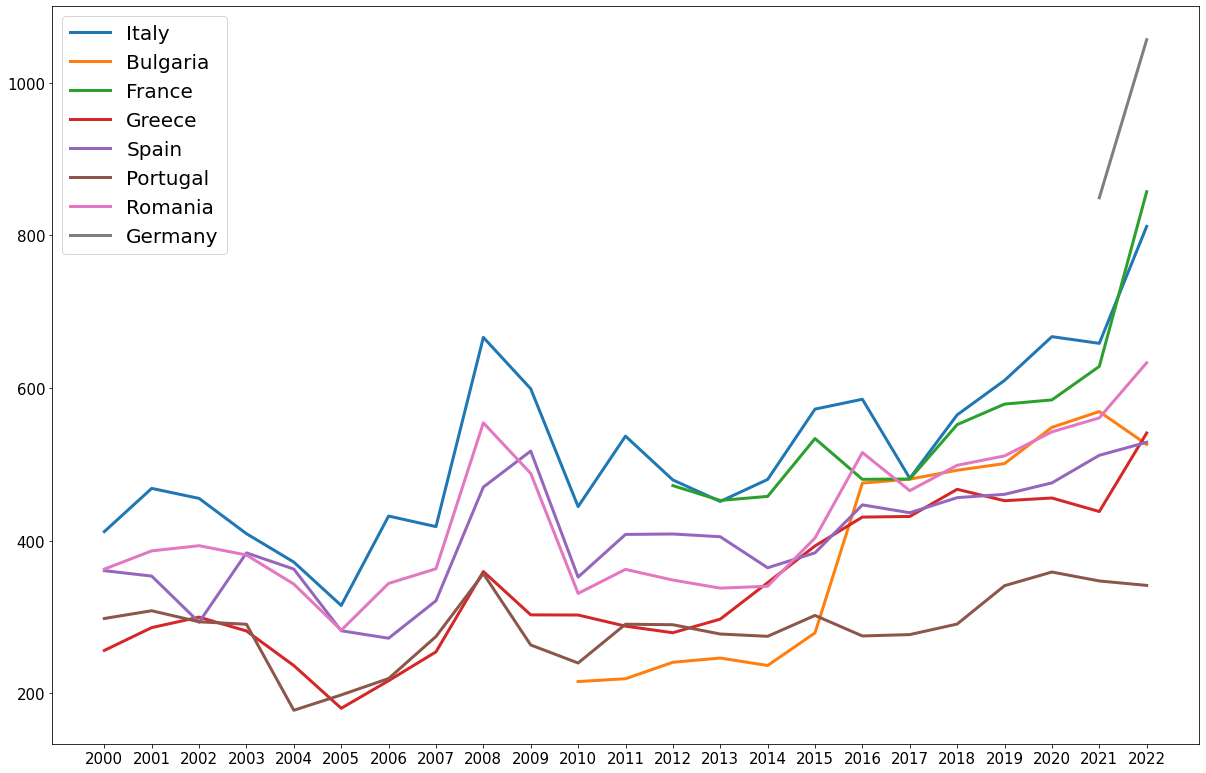

In [122]:
fig, ax = plt.subplots(figsize=(17, 11))
ax.plot(Italy.index, Italy["Italy"], label="Italy", linewidth=3)

ax.plot(Bulgaria.index, Bulgaria["Bulgaria"], label="Bulgaria", linewidth=3)

ax.plot(France.index, France["France"], label="France", linewidth=3)

ax.plot(Greece.index, Greece["Greece"], label="Greece", linewidth=3)

ax.plot(Spain.index, Spain["Spain"], label="Spain", linewidth=3)

ax.plot(Portugal.index, Portugal["Portugal"], label="Portugal", linewidth=3)

ax.plot(Romania.index, Romania["Romania"], label="Romania", linewidth=3)

ax.plot(Germany.index, Germany["Germany"], label="Germany", linewidth=3)
#ax.plot(year, Bulgaria, label="Bulgaria")
ax.legend(fontsize=20)
plt.rcParams.update({'font.size': 15})
plt.tight_layout()
plt.show()

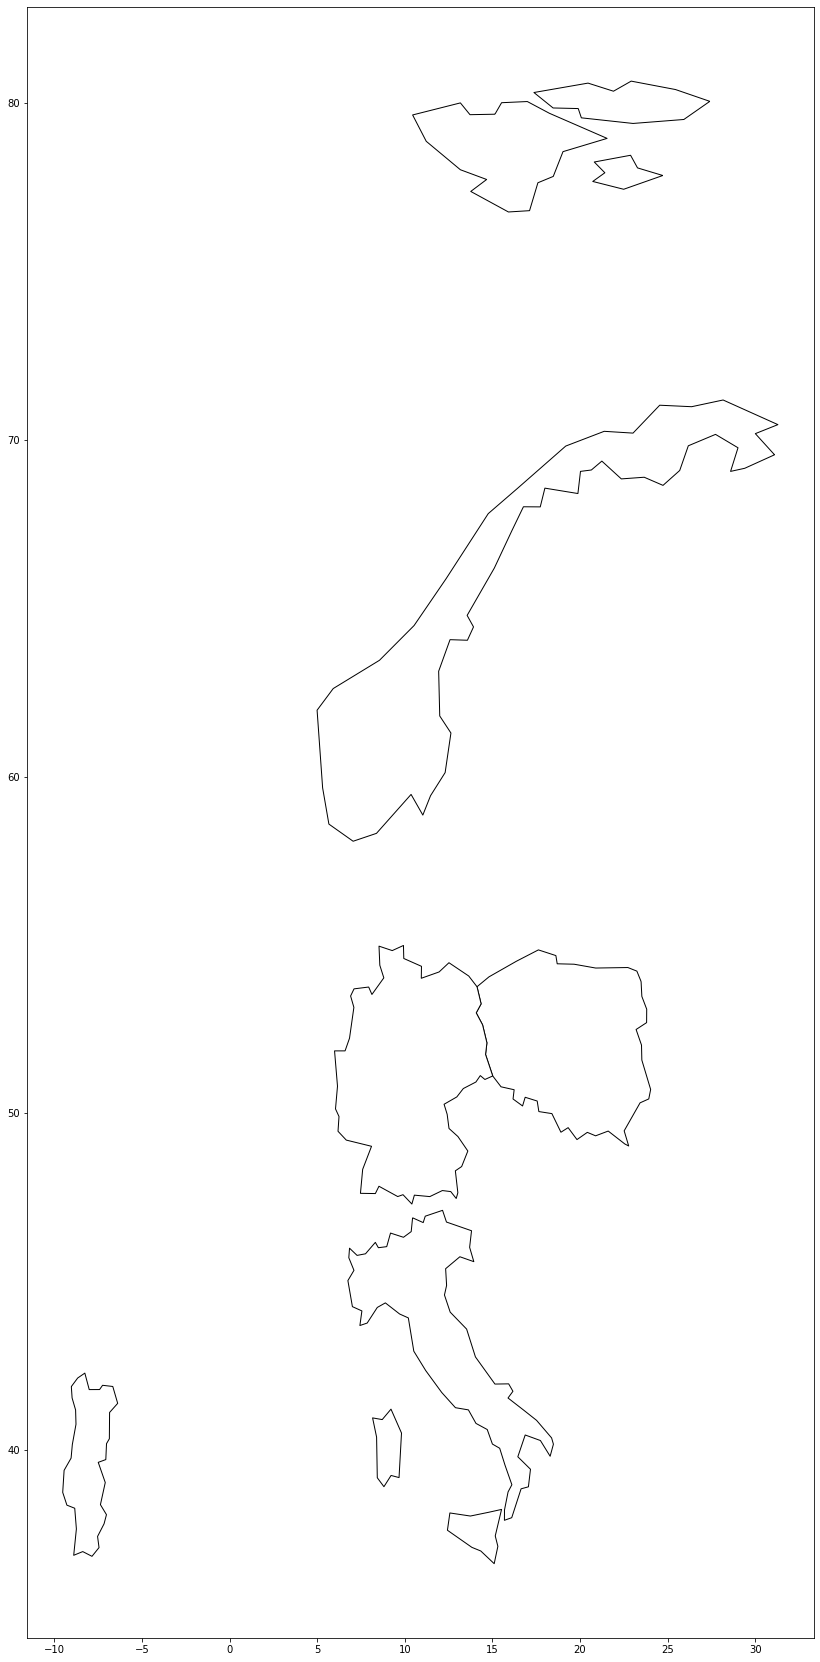

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.query("continent=='Europe'").query(f"name=={'Norway','Portugal','Italy','Germany','Poland'}").plot(color='white',edgecolor='black',figsize=(20,30)), 
figsize = (15,20)

Text(0.5, 74.43361717965095, 'Longitude')

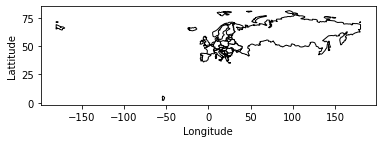

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#data = pd.read_csv("Repair_yards_africa.csv")

base = world[world.continent == 'Europe'].plot(color='white', edgecolor='black')

#data['Coordinates'] = list(zip(data.lon, data.lat))
#data['Coordinates'] = data['Coordinates'].apply(Point)
#geodata = gpd.GeoDataFrame(data, geometry='Coordinates')
#geodata.plot(ax=base, color='red', markersize=11)
plt.ylabel('Lattitude')
plt.xlabel('Longitude')